In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.preprocessing import maxabs_scale

In [26]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.layers import MaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [27]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [28]:
base_dir = path.join('..', 'data')
data_dir = path.join(base_dir, 'data_speech_commands_v0.02')
 
train_txt = path.join(data_dir, 'wav_train_16words.txt')
val_txt = path.join(data_dir, 'wav_validation_16words.txt')
test_txt = path.join(data_dir, 'wav_test_16words.txt')

train_data = np.load(path.join(data_dir, 'wav_train_data.npz'))
val_data = np.load(path.join(data_dir, 'wav_validation_data.npz'))
test_data = np.load(path.join(data_dir, 'wav_test_data.npz'))

In [ ]:
x_train = train_data['x_train']
y_train = train_data['y_train']
x_val = val_data['x_val']
y_val = val_data['y_val']
x_test = test_data['x_test']
y_test = test_data['y_test']
y_table = test_data['table']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table.shape

((36805, 16000, 1),
 (36805,),
 (4293, 16000, 1),
 (4293,),
 (4815, 16000, 1),
 (4815,),
 (16, 2))

In [ ]:
input_shape = x_test[0].shape
output_size = y_table.shape[0]

In [ ]:
x_train_abs = np.asarray([maxabs_scale(wav) for wav in x_train])
y_train_onehot = np.asarray([to_categorical(label, output_size) for label in y_train])
del x_train, y_train

x_val_abs = np.asarray([maxabs_scale(wav) for wav in x_val])
y_val_onehot = np.asarray([to_categorical(label, output_size) for label in y_val])
del x_val, y_val

x_test_abs = np.asarray([maxabs_scale(wav) for wav in x_test])
y_test_onehot = np.asarray([to_categorical(label, output_size) for label in y_test])
del x_test, y_test

In [ ]:
def build_1d_cnn_custom_ch_32_DO(conv_num=1):
    kernel_size = 64
    filter_size = 32
    
    model=Sequential()
    model.add(Conv1D (kernel_size=3*kernel_size, filters=filter_size, strides=1, 
                      padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
#     model.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))
    
    for i in range(conv_num-1):
        target_kernel_size = 3 * (kernel_size//(2**(i+1)))
        model.add(Conv1D (kernel_size=target_kernel_size if target_kernel_size != 0 else 3, 
                          filters=filter_size*(2**int((i+1)/4)), 
                          strides=1, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=3, strides=3))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [ ]:
for i in range(3, 10):
    model = build_1d_cnn_custom_ch_32_DO(conv_num=i)
#     model.summary()
    del model

Train on 36805 samples, validate on 4293 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.9906 - acc: 0.3459
Epoch 00001: val_loss improved from inf to 1.54743, saving model to model/checkpoint/1D_CNN_custom_kernel_192_ch_32_DO_3_conv_checkpoint/001-1.5474.hdf5
36805/36805 [==============================] - 62s 2ms/sample - loss: 1.9905 - acc: 0.3459 - val_loss: 1.5474 - val_acc: 0.5055
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.4220 - acc: 0.5515
Epoch 00002: val_loss improved from 1.54743 to 1.21399, saving model to model/checkpoint/1D_CNN_custom_kernel_192_ch_32_DO_3_conv_checkpoint/002-1.2140.hdf5
36805/36805 [==============================] - 58s 2ms/sample - loss: 1.4220 - acc: 0.5515 - val_loss: 1.2140 - val_acc: 0.6252
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.1614 - acc: 0.6465
Epoch 00003: val_loss improved from 1.21399 to 1.

Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9863
Epoch 00056: val_loss did not improve from 0.70319
36805/36805 [==============================] - 59s 2ms/sample - loss: 0.0505 - acc: 0.9863 - val_loss: 1.1578 - val_acc: 0.8130
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0458 - acc: 0.9880
Epoch 00057: val_loss did not improve from 0.70319
36805/36805 [==============================] - 59s 2ms/sample - loss: 0.0458 - acc: 0.9880 - val_loss: 1.1081 - val_acc: 0.8171
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0387 - acc: 0.9901
Epoch 00058: val_loss did not improve from 0.70319
36805/36805 [==============================] - 59s 2ms/sample - loss: 0.0387 - acc: 0.9901 - val_loss: 1.1377 - val_acc: 0.8195
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0447 - acc: 0.9885
Epoch 00059: val_loss did not improve from 0.70319
36805/36805 [===========

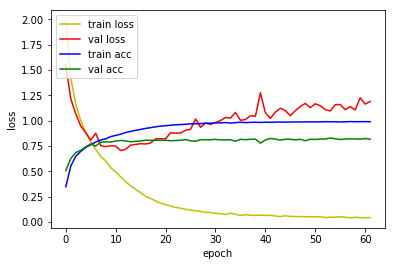

4815/4815 [==============================] - 3s 627us/sample - loss: 0.7908 - acc: 0.7765
Loss: 0.7907614937328723 Accuracy: 0.7765317

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2384 - acc: 0.2531
Epoch 00001: val_loss improved from inf to 1.71516, saving model to model/checkpoint/1D_CNN_custom_kernel_192_ch_32_DO_4_conv_checkpoint/001-1.7152.hdf5
36805/36805 [==============================] - 65s 2ms/sample - loss: 2.2383 - acc: 0.2531 - val_loss: 1.7152 - val_acc: 0.4573
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.6124 - acc: 0.4731
Epoch 00002: val_loss improved from 1.71516 to 1.39420, saving model to model/checkpoint/1D_CNN_custom_kernel_192_ch_32_DO_4_conv_checkpoint/002-1.3942.hdf5
36805/36805 [==============================] - 61s 2ms/sample - loss: 1.6129 - acc: 0.4731 - val_loss: 1.3942 - val_acc: 0.5574
Epoch 3/500
36800/36805 [============================>.] 

Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3038 - acc: 0.9074
Epoch 00024: val_loss did not improve from 0.53008
36805/36805 [==============================] - 61s 2ms/sample - loss: 0.3038 - acc: 0.9075 - val_loss: 0.5746 - val_acc: 0.8526
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2953 - acc: 0.9107
Epoch 00025: val_loss did not improve from 0.53008
36805/36805 [==============================] - 61s 2ms/sample - loss: 0.2954 - acc: 0.9106 - val_loss: 0.5572 - val_acc: 0.8642
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2834 - acc: 0.9126
Epoch 00026: val_loss did not improve from 0.53008
36805/36805 [==============================] - 61s 2ms/sample - loss: 0.2835 - acc: 0.9126 - val_loss: 0.5447 - val_acc: 0.8633
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2692 - acc: 0.9162
Epoch 00027: val_loss did not improve from 0.53008
36805/36805 [===========

Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1096 - acc: 0.9651
Epoch 00054: val_loss did not improve from 0.53008
36805/36805 [==============================] - 61s 2ms/sample - loss: 0.1096 - acc: 0.9651 - val_loss: 0.6667 - val_acc: 0.8663
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1045 - acc: 0.9658
Epoch 00055: val_loss did not improve from 0.53008
36805/36805 [==============================] - 61s 2ms/sample - loss: 0.1045 - acc: 0.9658 - val_loss: 0.6682 - val_acc: 0.8682
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1009 - acc: 0.9678
Epoch 00056: val_loss did not improve from 0.53008
36805/36805 [==============================] - 61s 2ms/sample - loss: 0.1009 - acc: 0.9678 - val_loss: 0.7018 - val_acc: 0.8656
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0990 - acc: 0.9689
Epoch 00057: val_loss did not improve from 0.53008
36805/36805 [===========

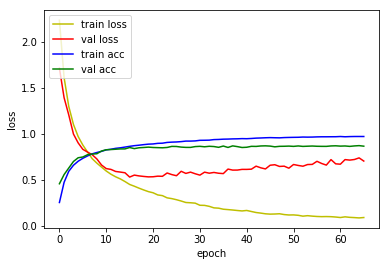

4815/4815 [==============================] - 3s 645us/sample - loss: 0.6292 - acc: 0.8249
Loss: 0.6291707925088433 Accuracy: 0.82492214

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2589 - acc: 0.2479
Epoch 00001: val_loss improved from inf to 1.80858, saving model to model/checkpoint/1D_CNN_custom_kernel_192_ch_32_DO_5_conv_checkpoint/001-1.8086.hdf5
36805/36805 [==============================] - 68s 2ms/sample - loss: 2.2588 - acc: 0.2479 - val_loss: 1.8086 - val_acc: 0.4260
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.6624 - acc: 0.4575
Epoch 00002: val_loss improved from 1.80858 to 1.43201, saving model to model/checkpoint/1D_CNN_custom_kernel_192_ch_32_DO_5_conv_checkpoint/002-1.4320.hdf5
36805/36805 [==============================] - 63s 2ms/sample - loss: 1.6625 - acc: 0.4575 - val_loss: 1.4320 - val_acc: 0.5516
Epoch 3/500
36800/36805 [============================>.]

Epoch 23/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2754 - acc: 0.9147
Epoch 00023: val_loss did not improve from 0.40569
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.2754 - acc: 0.9147 - val_loss: 0.4152 - val_acc: 0.8908
Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2667 - acc: 0.9163
Epoch 00024: val_loss did not improve from 0.40569
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.2667 - acc: 0.9163 - val_loss: 0.4090 - val_acc: 0.9017
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2527 - acc: 0.9196
Epoch 00025: val_loss did not improve from 0.40569
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.2527 - acc: 0.9196 - val_loss: 0.4286 - val_acc: 0.8945
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2428 - acc: 0.9232
Epoch 00026: val_loss did not improve from 0.40569
36805/36805 [===========

Epoch 52/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1150 - acc: 0.9627
Epoch 00052: val_loss did not improve from 0.38658
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.1151 - acc: 0.9627 - val_loss: 0.4194 - val_acc: 0.9126
Epoch 53/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1255 - acc: 0.9601
Epoch 00053: val_loss did not improve from 0.38658
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.1255 - acc: 0.9601 - val_loss: 0.4227 - val_acc: 0.9140
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1050 - acc: 0.9645
Epoch 00054: val_loss did not improve from 0.38658
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.1050 - acc: 0.9645 - val_loss: 0.4437 - val_acc: 0.9092
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1073 - acc: 0.9654
Epoch 00055: val_loss did not improve from 0.38658
36805/36805 [===========

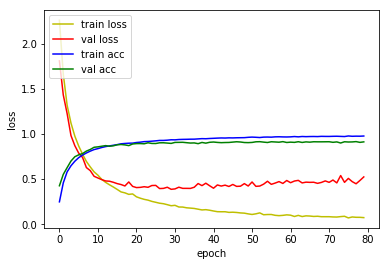

4815/4815 [==============================] - 3s 668us/sample - loss: 0.4770 - acc: 0.8758
Loss: 0.4769584953970627 Accuracy: 0.8758048

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.3697 - acc: 0.2144
Epoch 00001: val_loss improved from inf to 1.77170, saving model to model/checkpoint/1D_CNN_custom_kernel_192_ch_32_DO_6_conv_checkpoint/001-1.7717.hdf5
36805/36805 [==============================] - 69s 2ms/sample - loss: 2.3696 - acc: 0.2145 - val_loss: 1.7717 - val_acc: 0.4330
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.6570 - acc: 0.4637
Epoch 00002: val_loss improved from 1.77170 to 1.34155, saving model to model/checkpoint/1D_CNN_custom_kernel_192_ch_32_DO_6_conv_checkpoint/002-1.3415.hdf5
36805/36805 [==============================] - 64s 2ms/sample - loss: 1.6569 - acc: 0.4638 - val_loss: 1.3415 - val_acc: 0.5751
Epoch 3/500
36800/36805 [============================>.] 

Epoch 23/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3335 - acc: 0.8973
Epoch 00023: val_loss did not improve from 0.32194
36805/36805 [==============================] - 64s 2ms/sample - loss: 0.3335 - acc: 0.8973 - val_loss: 0.3535 - val_acc: 0.9019
Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3287 - acc: 0.8971
Epoch 00024: val_loss did not improve from 0.32194
36805/36805 [==============================] - 64s 2ms/sample - loss: 0.3287 - acc: 0.8971 - val_loss: 0.3411 - val_acc: 0.9071
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3094 - acc: 0.9031
Epoch 00025: val_loss improved from 0.32194 to 0.31294, saving model to model/checkpoint/1D_CNN_custom_kernel_192_ch_32_DO_6_conv_checkpoint/025-0.3129.hdf5
36805/36805 [==============================] - 64s 2ms/sample - loss: 0.3094 - acc: 0.9031 - val_loss: 0.3129 - val_acc: 0.9138
Epoch 26/500
36800/36805 [============================>.] - ETA: 0

Epoch 51/500
 4992/36805 [===>..........................] - ETA: 53s - loss: 0.1608 - acc: 0.9465

In [ ]:
for i in range(3, 10):
    base = '1D_CNN_custom_kernel_192_ch_32_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_1d_cnn_custom_ch_32_DO(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [37]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = '1D_CNN_custom_kernel_192_ch_32_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(3, 10):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_kernel_192_ch_32_DO_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_465 (Conv1D)          (None, 16000, 32)         6176      
_________________________________________________________________
activation_465 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_466 (Conv1D)          (None, 16000, 32)         98336     
_________________________________________________________________
activation_466 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
max_pooling1d_387 (MaxPoolin (None, 5333, 32)          0         
_________________________________________________________________
conv1d_467 (Conv1D)          (None, 5333, 32)          49184     
_________________________________________________________________
activation_467 (Activation) 

4815/4815 [==============================] - 4s 783us/sample - loss: 0.3332 - acc: 0.9213
Loss: 0.33323031511633566 Accuracy: 0.92128766

1D_CNN_custom_kernel_192_ch_32_DO_7_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_483 (Conv1D)          (None, 16000, 32)         6176      
_________________________________________________________________
activation_483 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_484 (Conv1D)          (None, 16000, 32)         98336     
_________________________________________________________________
activation_484 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
max_pooling1d_401 (MaxPoolin (None, 5333, 32)          0         
_________________________________________________________________
conv1d_485 (Conv1D)    

4815/4815 [==============================] - 4s 834us/sample - loss: 0.2022 - acc: 0.9445
Loss: 0.20224866479526923 Accuracy: 0.9445483


In [38]:
for i in range(3, 10):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


1D_CNN_custom_kernel_192_ch_32_DO_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_465 (Conv1D)          (None, 16000, 32)         6176      
_________________________________________________________________
activation_465 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_466 (Conv1D)          (None, 16000, 32)         98336     
_________________________________________________________________
activation_466 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
max_pooling1d_387 (MaxPoolin (None, 5333, 32)          0         
_________________________________________________________________
conv1d_467 (Conv1D)          (None, 5333, 32)          49184     
_________________________________________________________________
activation_467 (Activation) 

4815/4815 [==============================] - 4s 866us/sample - loss: 0.3469 - acc: 0.9269
Loss: 0.3468662891927662 Accuracy: 0.92689514

1D_CNN_custom_kernel_192_ch_32_DO_7_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_483 (Conv1D)          (None, 16000, 32)         6176      
_________________________________________________________________
activation_483 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
conv1d_484 (Conv1D)          (None, 16000, 32)         98336     
_________________________________________________________________
activation_484 (Activation)  (None, 16000, 32)         0         
_________________________________________________________________
max_pooling1d_401 (MaxPoolin (None, 5333, 32)          0         
_________________________________________________________________
conv1d_485 (Conv1D)     

4815/4815 [==============================] - 4s 931us/sample - loss: 0.2235 - acc: 0.9466
Loss: 0.2234834822519515 Accuracy: 0.9466251
